# Churn bank clients prediction

The main purpose of this project is to predict the churners from the list of the bank clients. There are 3 monthly reports about the clients' financial activity with some personal info. The goal is to predict churn customers. The churner is defined as a client whose liquidity will drop by 20% in 3 month. To exclude some ordinary fluctuations it is checked that during 6 month before the drop the balance had been stable as well as 3 month after the drop.

The outline of the project is following:

1. Data loading and preprocessing:

    1.1 Duplicates
    
    1.2 Missing values
    
    
2. Data exploration:

    2.1 Personal information
    
    2.2 Financial binary features
    
    2.3 Financial continuous features
    
3. Feature engineering

    

    
    


## 1. Data loading and preprocessing

First step is to import necessary libraries.

In [60]:
#importing some packages for data manipulation and plotting
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from tqdm import tqdm

#set random state for reproducibility of the results
random_state = 17111995

#removing any warnings from the output
import warnings
warnings.filterwarnings("ignore")

#increasing display setting so the tables do not get cropped
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

Now I am loading data from the given csv files - reports on the clients activity during the three consecutive months. In the last table there is also target column I need to predict.

In [2]:
data_3 = pd.read_csv('data/train_month_3_with_target.csv', index_col='client_id') 
data_2 = pd.read_csv("data/train_month_2.csv", index_col='client_id')
data_1 = pd.read_csv("data/train_month_1.csv", index_col='client_id')

data_list = [data_3, data_2, data_1]

Let's have a first look at the data. We can divide the columns into 3 groups: personal information (starts with "customer_") , financial binary (starts with "has_") and financial continuous(starts with "balance_"). Two columns `visits_distinct_so` and `visits_distinct_so_areas` are count values and hard to place into any mentioned group. 

In [3]:
data_3.head()

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,has_pension_saving,has_savings_account,has_savings_account_starter,has_current_account_starter,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,target
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,20,0,0,590,0,22000,0,0,1.0,1.0,1983-03,1994-08,1,1943-09,3630,9.0,0,0.0,NaN,NaN,0
4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,940,0,10570,0,0,1.0,1.0,2017-01,2017-01,1,1994-02,2460,9.0,0,NaN,mature,couple,0
f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,320,0,0,1210,0,15200,0,0,1.0,1.0,1980-12,1980-12,2,1936-10,2660,9.0,0,NaN,NaN,single,0
26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,160,0,0,0,0,29020,0,0,1.0,1.0,1998-08,2013-10,1,1946-09,6600,9.0,0,NaN,NaN,NaN,0
c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,13650,0,0,1.0,1.0,2012-11,2012-11,2,1996-04,8550,9.0,0,NaN,mature,couple,1


### 1.1 Duplicates

In [4]:
data_3[data_3.duplicated()]

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,has_pension_saving,has_savings_account,has_savings_account_starter,has_current_account_starter,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,target
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3c7b83c4da3aee56463bba8b12b40f74,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,15000,0,0,1.0,1.0,1998-05,1998-05,1,1998-01,9500,9.0,0,NaN,mature,couple,0
3eef1b83c87a19069befa7341c643d9d,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5010,0,0,1.0,1.0,2001-02,2001-02,2,2000-08,1090,9.0,0,NaN,adolescent,couple,0
071b3409df7a926e73e360c32b049f19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6490,0,0,1.0,1.0,1997-12,1997-12,1,1996-12,2230,9.0,0,NaN,mature,couple,0


Although the rows are similar, they refer to different clients, so no duplicates. Next concern is missing data.

### 1.2 Missing values

In [5]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63697 entries, 910df42ad36243aa4ce16324cd7b15b0 to 977dda870c3f54df46297df3869b2907
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   homebanking_active                 63697 non-null  int64  
 1   has_homebanking                    63697 non-null  int64  
 2   has_insurance_21                   63697 non-null  int64  
 3   has_insurance_23                   63697 non-null  int64  
 4   has_life_insurance_fixed_cap       63697 non-null  int64  
 5   has_life_insurance_decreasing_cap  63697 non-null  int64  
 6   has_fire_car_other_insurance       63697 non-null  int64  
 7   has_personal_loan                  63697 non-null  int64  
 8   has_mortgage_loan                  63697 non-null  int64  
 9   has_current_account                63697 non-null  int64  
 10  has_pension_saving                 63697 non-null  int64  
 11  h

Some columns related to personal info contain missing values. The easiest option is to delete the rows when there are not so many missing values like for columns `customer_since_all` and `customer_since_bank`. For other columns we would just create additional category for missing values. 

In [6]:
def missing_values(data_origin):
    data = data_origin.copy()
    data['customer_occupation_code'].fillna(-1, inplace=True)
    data['customer_education'].fillna(-1, inplace=True)
    data['customer_relationship'].fillna('Unknown', inplace = True)
    data['customer_children'].fillna('Unknown', inplace = True)
    data.dropna(subset=['customer_since_all', 'customer_since_bank'], inplace=True)
    return data

data_3_wo_miss = missing_values(data_3)
data_3_wo_miss.isna().sum().sum()

0

There is no more missing values, so we can proceed to the data exploration part.

## 2. Data exploration

### 2.1 Personal information about the clients

I start with the personal data of the clients (columns starting with 'customer'). As the personal data is very unlikely to change over time I only take the columns of the most recent table.

In [79]:
personal = list(data_3_wo_miss.columns[data_3_wo_miss.columns.str.startswith('customer')])
data_pers = data_3_wo_miss[personal]
data_pers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63448 entries, 910df42ad36243aa4ce16324cd7b15b0 to 977dda870c3f54df46297df3869b2907
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_since_all        63448 non-null  object 
 1   customer_since_bank       63448 non-null  object 
 2   customer_gender           63448 non-null  int64  
 3   customer_birth_date       63448 non-null  object 
 4   customer_postal_code      63448 non-null  int64  
 5   customer_occupation_code  63448 non-null  float64
 6   customer_self_employed    63448 non-null  int64  
 7   customer_education        63448 non-null  float64
 8   customer_children         63448 non-null  object 
 9   customer_relationship     63448 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 7.3+ MB


In [80]:
data_pers.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_gender,63448.0,1.486887,0.499832,1.0,1.0,1.0,2.0,2.0
customer_postal_code,63448.0,5577.777471,3020.259071,0.0,2650.0,4880.0,8750.0,9992.0
customer_occupation_code,63448.0,8.468762,2.031697,-1.0,9.0,9.0,9.0,9.0
customer_self_employed,63448.0,0.086843,0.281607,0.0,0.0,0.0,0.0,1.0
customer_education,63448.0,-0.099215,1.705630,-1.0,-1.0,-1.0,0.0,6.0


There are some issues with the data that need to be solved before plotting the graphs:

- **customer_since_all**: shows the date when the client first bought a bank or insurance product. The column needs to be transformed from dates into time period like years. I can replace missing values with medians for the given age. 

- **customer_since_bank**: shows the date when the client first bought a bank product. I also need to transform the column from dates into time period like years. I can replace missing values with medians for the given age.

- **customer_gender**: encoded 1 for male and 2 for female. Better transform into 0-1 coding. 

- **customer_birth_date**: shows the birth date of the client. I need to transform the column from dates into time period like years.

- **customer_postal_code**: the column needs transformation since it cannot be treated as continuous and changing it into categorical variable would result into high-level categorical variable. I suggest groupping postal codes into larger groups like province by taking the first digit of the code. 

- **customer_occupation_code**: I do not know how the information was coded, so there is nothing that can be done with the missing data except putting it into a separate category.

- **customer_self_employed**: 0 for not self-employed and 1 for self-employed. No issue with the column.

- **customer_education**: no information on the coding process, so I am putting the missing values into a separate group. This column has the largest ratio of missing values. Need to check the dependence between the groups and target value.

- **customer_children**: categorical variable describing family situation. I believe it would be a good option to transform the column into more simple category value - 'no children' or 'one and more children'. Very unlikley that the age and number of children can influence the decision of the client to leave the bank. Missing values would be in a different group. Missingness can be a good feature showing that a client does not want to disclose personal information as he or she plans to leave the bank.

- **customer_relationship**: there are 3 groups: single, couple and NA. Also saving missingness as a feature.



Below I write `personal_data` function which transforms the personal information columns.

In [81]:
#function to preprocess personal info columns
def date_to_year(data_raw):
    
    data=data_raw.copy()
    
    #transforming columns with date to age/period of years
    date_col = ['customer_birth_date', 'customer_since_all', 'customer_since_bank']
    for col in date_col:
        data[col] = pd.to_datetime(data[col])
    data['customer_age'] = 2018 - data['customer_birth_date'].dt.year
    data['customer_since_all'] = (2018 - data['customer_since_all'].dt.year)
    data['customer_since_bank'] = 2018 - data['customer_since_bank'].dt.year
    data.drop('customer_birth_date', axis=1, inplace=True)
    
    return data

In [82]:
data_pers_new = date_to_year(data_pers)

In [83]:
data_pers_new.head()

,customer_since_all,customer_since_bank,customer_gender,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,customer_age
client_id,,,,,,,,,,
910df42ad36243aa4ce16324cd7b15b0,35,24,1,3630,9.0,0,0.0,Unknown,Unknown,75
4e19dc3a54323c5bbfc374664b950cd1,1,1,1,2460,9.0,0,-1.0,mature,couple,24
f5d08db1b86c0cb0f566bf446cff1fb4,38,38,2,2660,9.0,0,-1.0,Unknown,single,82
26170ecf63653e215c52f4262c1c4859,20,5,1,6600,9.0,0,-1.0,Unknown,Unknown,72
c078009957dffb64f20e61b41220a976,6,6,2,8550,9.0,0,-1.0,mature,couple,22


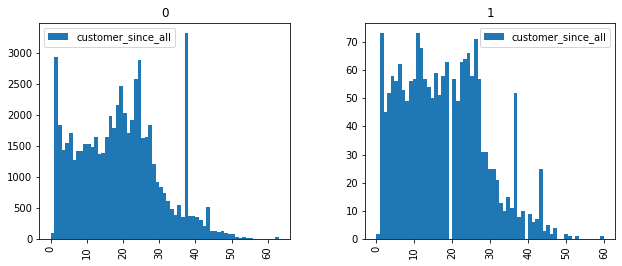

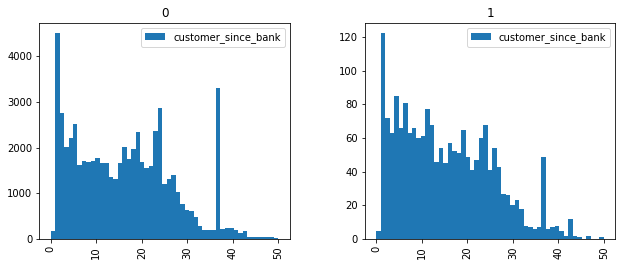

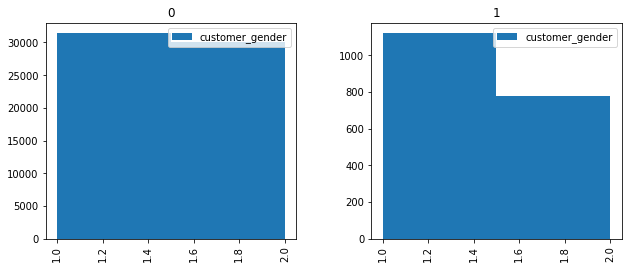

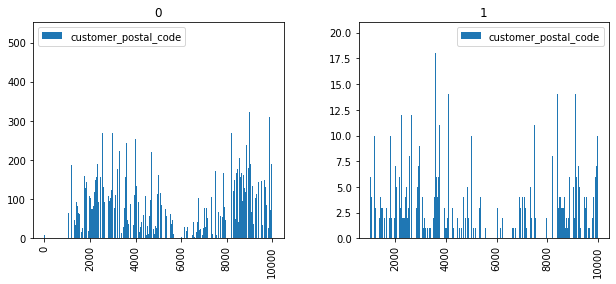

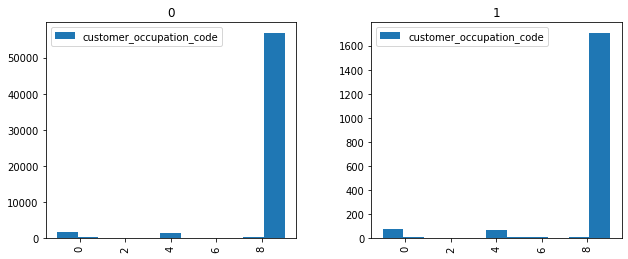

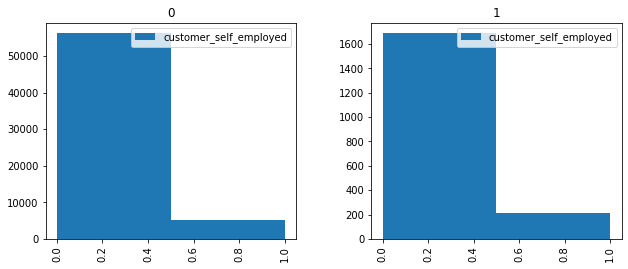

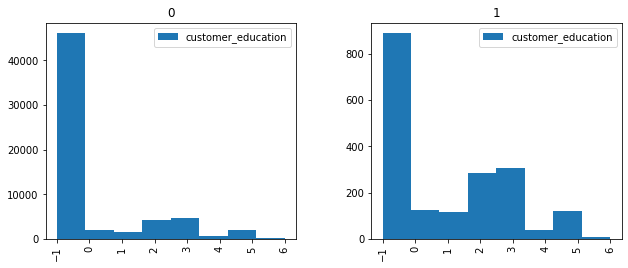

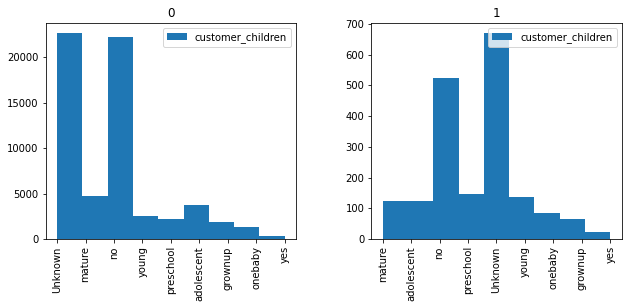

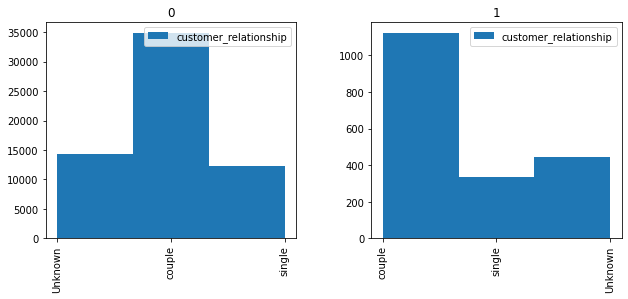

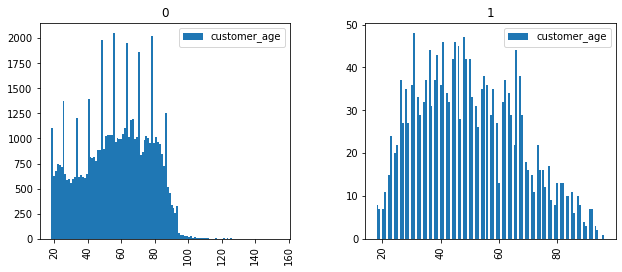

In [84]:
data_pers_new['target'] = data_3_wo_miss['target']

for i in data_pers_new.columns[:-1]:
    n_bins = data_pers_new[i].nunique()
    data_pers_new[[i,'target']].hist(column = i, grid=False, figsize = (10,4), by ='target', legend=True, bins=n_bins)
    plt.show()

Distribution plots of personal info columns can give us some insight about the data. There are 2 plots for each variable - for churners and non-churners. From the scale difference of y-axis we can state the inbalance of the data.

First we have the period of time the client has been using insurence and bank services `customer_since_all` and `customer_since_bank`. Suprisingly, we have long-term clients who are potential churners. We can also see a splash of clients who first came to the bank about 35-36 years ago. This splash is certainly is not accidental, as it appears in all 4 graphs. Probably, some sucessfull ad campaign which attracted many new clients.

Next column `customer_gender` shows some slight difference. We have fewer female clients in general, but they also are less likely to be churners. It is doubtful that there is a great gender impact on the client loayalty to the bank. 


The column `customer_occupation_code` is very unbalanced. We have most of the observations of group 9. Very likely this feature would not contribute much for the target value. Moreover, the graphs for both target groups are very similar. It is also the case for the variables `customer_seld_employed`, `customer_relationship` and `customer_children`. For the last one it would be logical to regroup the categorties into 'yes', 'no', 'unknown'. 

Very unusual grpahs for `customer_eduction` variable. We see that customers who disclosed their education are more likely to be churners. Also data is very unbalanced, so I would also regroup the codes in 'disclosed' and 'not disclosed'. 

Finally, `customer_age` plot shows some difference more related to the outliers than the target group. For non-churners there are some clients who are very old (up to 150) which seems suspicious. I will cut-off more than 100 year old clients. 




array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

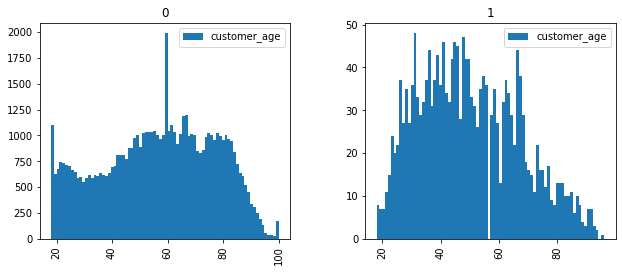

In [85]:
data_pers_new['customer_age'][data_pers_new['customer_age']>100]=100
data_pers_new[['customer_age','target']].hist(column = 'customer_age', grid=False, figsize = (10,4), by ='target', legend=True,
                                              bins = 80)

After plotting `customer_age` variable without outliers, we can say that the skewness of the graphs that older people are less likely to be churners than young. This feature can be importance for the churn prediction.

Plotting `customer_postal_code` itself does not dive much information. We can see high number for postal offices for highly populated cities. However, comparing the graphs with regard to the target value shows some difference. So I will group the postal codes by their first digit and there would be 10 groups - much less than 10000 but still reserve some information. 

In [86]:
data_pers_new['customer_province'] = data_pers_new['customer_postal_code']//1000
data_pers_new.drop('customer_postal_code', axis=1, inplace=True)

In [108]:
data_pers_new['customer_children_no'] = data_pers_new['customer_children']=='no'
data_pers_new['customer_children_unknown'] = data_pers_new['customer_children']=='Unknown'

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [94]:
data_pers_fin = pd.get_dummies(data_pers_new, drop_first = True)

In [95]:
data_pers_fin

,customer_since_all,customer_since_bank,customer_gender,customer_occupation_code,customer_self_employed,customer_education,customer_age,target,customer_province,customer_children_adolescent,customer_children_grownup,customer_children_mature,customer_children_no,customer_children_onebaby,customer_children_preschool,customer_children_yes,customer_children_young,customer_relationship_couple,customer_relationship_single
client_id,,,,,,,,,,,,,,,,,,,
910df42ad36243aa4ce16324cd7b15b0,35,24,1,9.0,0,0.0,75,0,3,0,0,0,0,0,0,0,0,0,0
4e19dc3a54323c5bbfc374664b950cd1,1,1,1,9.0,0,-1.0,24,0,2,0,0,1,0,0,0,0,0,1,0
f5d08db1b86c0cb0f566bf446cff1fb4,38,38,2,9.0,0,-1.0,82,0,2,0,0,0,0,0,0,0,0,0,1
26170ecf63653e215c52f4262c1c4859,20,5,1,9.0,0,-1.0,72,0,6,0,0,0,0,0,0,0,0,0,0
c078009957dffb64f20e61b41220a976,6,6,2,9.0,0,-1.0,22,1,8,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0a58f2eb841ddac0626dacac6ca69524,20,20,2,9.0,0,-1.0,36,0,8,0,0,0,1,0,0,0,0,1,0
193be2222be99bf04f42193b5cdfb95d,29,29,2,9.0,0,1.0,53,0,2,0,0,0,0,0,0,0,0,0,0
fa9f074ec8cad610ccaec2270021490e,27,27,2,9.0,0,3.0,42,0,1,0,0,0,0,0,0,0,0,0,1


### 2.2 Financial binary features

In [14]:
fin_bin = list(data_3_wo_miss.columns[data_3_wo_miss.columns.str.startswith('has')])
fin_bin.append('homebanking_active')
data_fin_bin = data_3_wo_miss[fin_bin]
data_fin_bin.describe().T

,count,mean,std,min,25%,50%,75%,max
has_homebanking,63448.0,0.281033,0.449507,0.0,0.0,0.0,1.0,1.0
has_insurance_21,63448.0,0.094991,0.293205,0.0,0.0,0.0,0.0,1.0
has_insurance_23,63448.0,0.009945,0.099229,0.0,0.0,0.0,0.0,1.0
has_life_insurance_fixed_cap,63448.0,0.002727,0.052146,0.0,0.0,0.0,0.0,1.0
has_life_insurance_decreasing_cap,63448.0,0.111934,0.315288,0.0,0.0,0.0,0.0,1.0
has_fire_car_other_insurance,63448.0,0.317189,0.465385,0.0,0.0,0.0,1.0,1.0
has_personal_loan,63448.0,0.041577,0.199623,0.0,0.0,0.0,0.0,1.0
has_mortgage_loan,63448.0,0.098112,0.297468,0.0,0.0,0.0,0.0,1.0
has_current_account,63448.0,0.500678,0.500003,0.0,0.0,1.0,1.0,1.0
has_pension_saving,63448.0,0.021971,0.146589,0.0,0.0,0.0,0.0,1.0


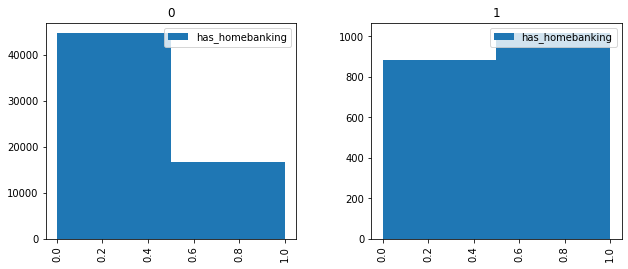

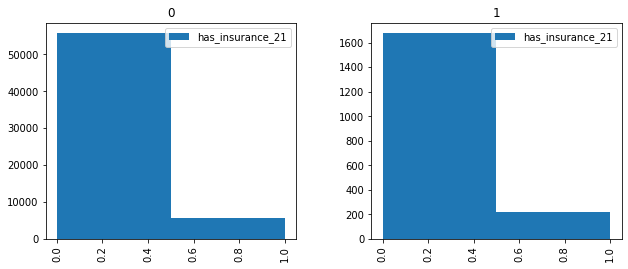

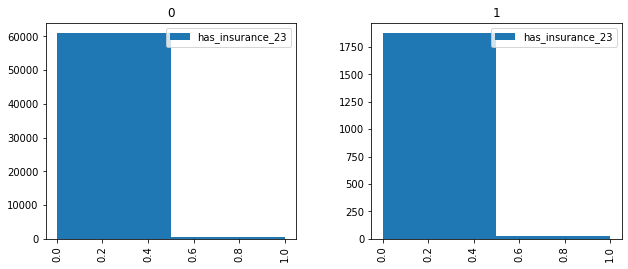

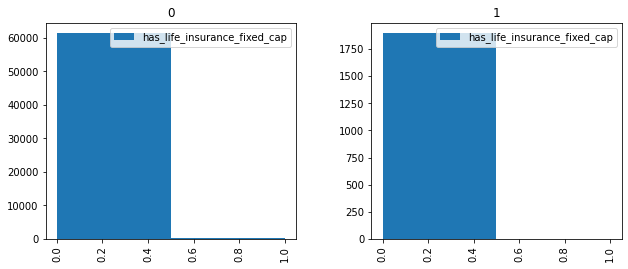

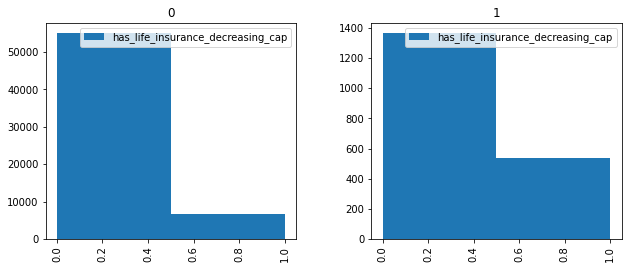

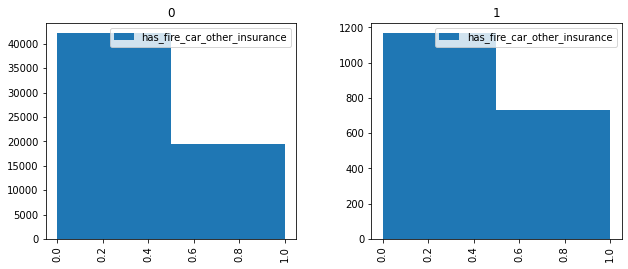

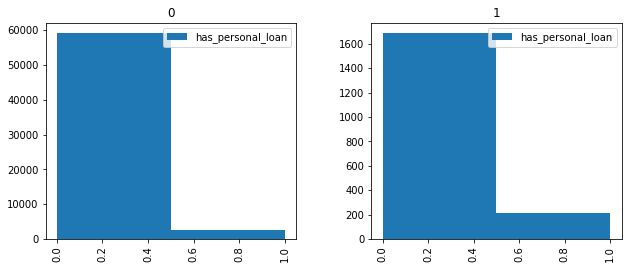

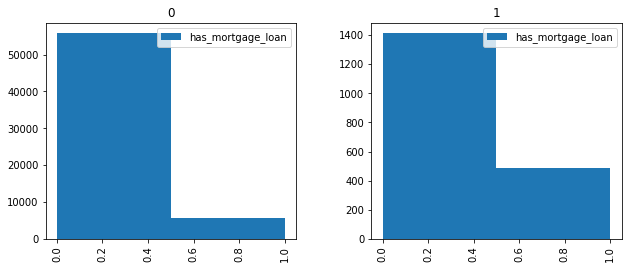

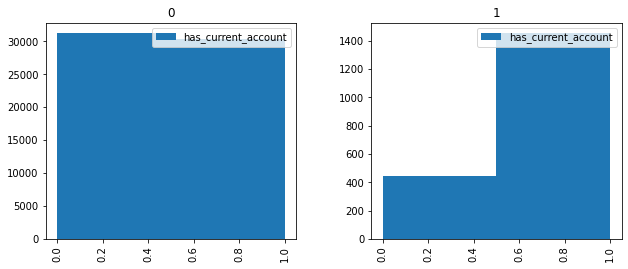

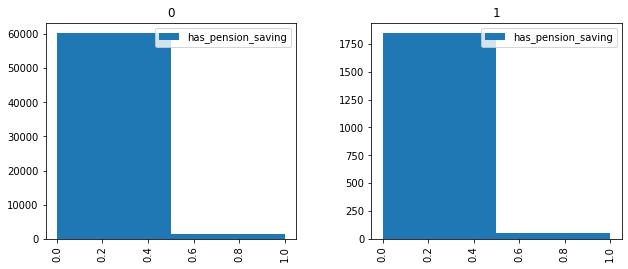

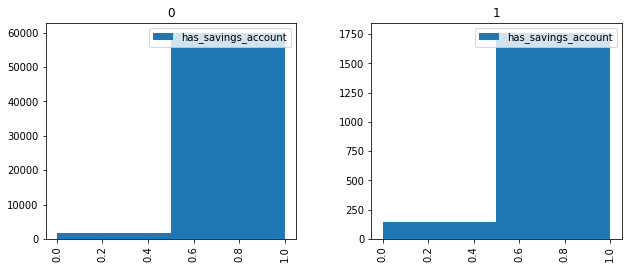

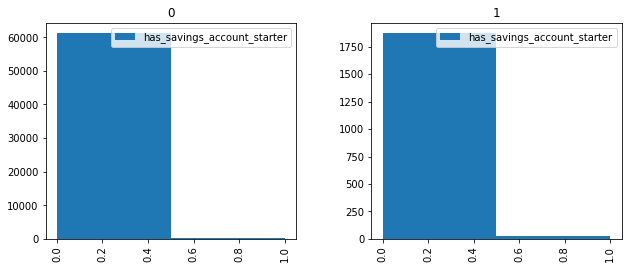

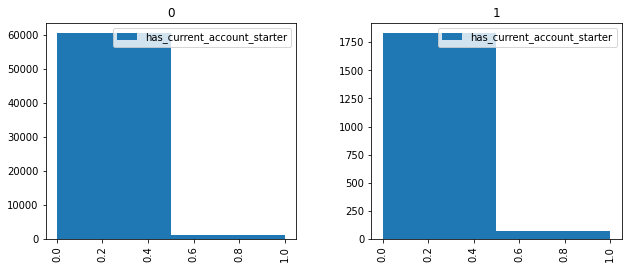

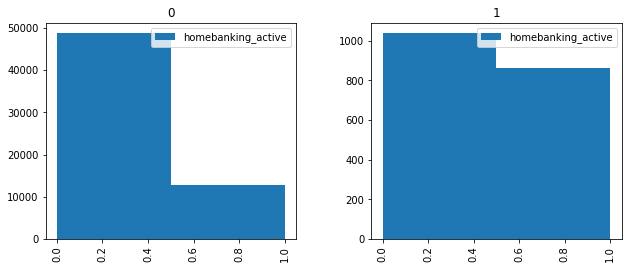

In [15]:
data_fin_bin['target'] = data_3_wo_miss['target']

for i in data_fin_bin.columns[:-1]:
    data_fin_bin[[i,'target']].hist(column = i, grid=False, figsize = (10,4), by ='target', legend=True, bins=2)
    plt.show()

Some of the binary features are very zero inflated, but it is not a problem if the ones have predictive power. From the graphs we can see that many features have different proportions for churners and non-churners, especially for `has_homebanking`,  `has_mortgage_loan`, `has_current_account` and `homebanking_active`, but the major problem is that the binary variables do not add more information given the continuous variables. For example, if a person does not have a current account, they would have zero as balance and if a balance is different from 0, then they apparently have an account. The only issue might be that a person has an account but there is no money on the account. To check the hypothesis I am going to try different models with and without the binary variables and check the impact on the model performance.

### 2.3 Financial continuous features

In [16]:
fin_cont = list(data_3_wo_miss.columns[data_3_wo_miss.columns.str.startswith('bal')])
data_fin_cont = data_3_wo_miss[fin_cont]
data_fin_cont.describe().T

,count,mean,std,min,25%,50%,75%,max
bal_insurance_21,63448.0,457.596142,1641.449882,0.0,0.0,0.0,0.0,10000.0
bal_insurance_23,63448.0,47.463592,536.619562,0.0,0.0,0.0,0.0,9890.0
bal_personal_loan,63448.0,402.257282,2662.009823,0.0,0.0,0.0,0.0,71690.0
bal_mortgage_loan,63448.0,8878.514532,35561.294884,0.0,0.0,0.0,0.0,490000.0
bal_current_account,63448.0,1323.847875,2686.636149,-1000.0,0.0,0.0,1520.0,20000.0
bal_pension_saving,63448.0,233.478754,2138.907371,0.0,0.0,0.0,0.0,41170.0
bal_savings_account,63448.0,17873.903669,11753.765033,0.0,8450.0,15170.0,25480.0,50000.0
bal_savings_account_starter,63448.0,57.816322,894.622569,0.0,0.0,0.0,0.0,24050.0
bal_current_account_starter,63448.0,30.419083,408.640991,-330.0,0.0,0.0,0.0,19790.0


<AxesSubplot:>

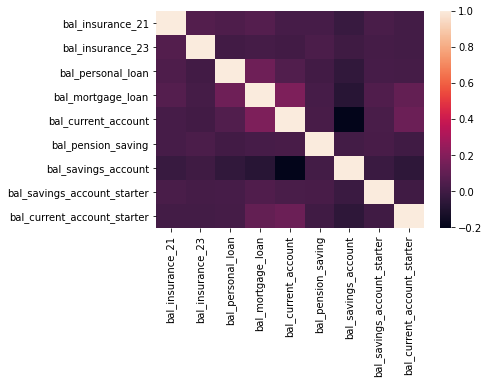

In [17]:
sns.heatmap(data_fin_cont.corr())

The variables are not correlated, which is a good sign, as we do not have to deal with multicolinearity. But with all the three periods we definetely end up with some correlation. If a person has a loan, there is a high chance the loan remains next 2 months and the balance of the loan would not variate significantly. So to avoid high correlation between the covariates I am applying some feature engineering techniques in section 3.

### 2.4 Count variables

There are 2 variables that a bit differ from others so I am putting them in a separate subsection to explore.

In [18]:
count_vis = list(data_3_wo_miss.columns[data_3_wo_miss.columns.str.startswith('visit')])
data_count_vis = data_3_wo_miss[count_vis]
data_count_vis.describe().T

,count,mean,std,min,25%,50%,75%,max
visits_distinct_so,63448.0,1.229858,0.501259,1.0,1.0,1.0,1.0,7.0
visits_distinct_so_areas,63448.0,1.042586,0.224892,1.0,1.0,1.0,1.0,6.0


In [19]:
data_count_vis.corr()

,visits_distinct_so,visits_distinct_so_areas
visits_distinct_so,1.000000,0.510032
visits_distinct_so_areas,0.510032,1.000000


There is definitely some correlation between the variables, but it is not significant to reduce the performance of the models. As well as financial variables, we need to deal with longitudinal data.  

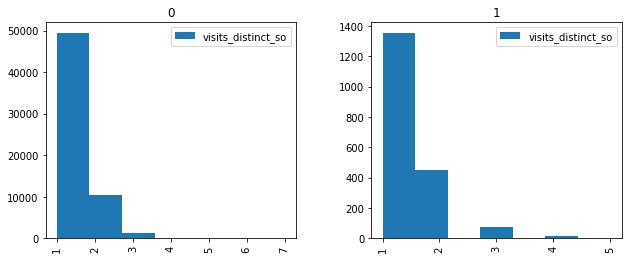

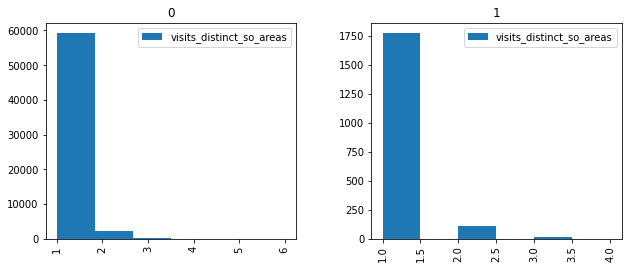

In [20]:
data_count_vis['target'] = data_3_wo_miss['target']

for i in data_count_vis.columns[:-1]:
    n_bins = data_count_vis[i].nunique()
    data_count_vis[[i,'target']].hist(column = i, grid=False, figsize = (10,4), by ='target', legend=True, bins=n_bins)
    plt.show()

Most people just visit the same sales office at the same area. For churners it is relatively higher chance that they visit different offices. 

## 3. Feature engineering

Now we need to transform the longitudinal data (all except personal information). I am going to calculate the relative change over time so for each feature there would be 3 columns: the most recent (not changed), relative change of the third month compared to the previous (second) month and relative change of the second month compared to the first month. For convenience I will write a function:

In [21]:
#function to calculte the variation over time
def percent_change(col1, col2):
    col3 = [0 for i in range(len(col1))]
    for i in range(len(col1)):
        if col1[i]==0:
            if col2[i]==0:
                col3[i]=0
            else:
                col3[i]=1
        else:
            col3[i] = (col2[i]-col1[i])/col1[i]
    return col3

Now we can transform the data and merge into one table for further analysis.

In [27]:
#removing clients we deleted in section 1.2
data_2_wo_miss = data_2.loc[data_3_wo_miss.index]
data_1_wo_miss = data_1.loc[data_3_wo_miss.index]

#selecting columns without personal info
non_pers_cols = [*fin_bin, *fin_cont, *count_vis]
data_2_rel = data_2_wo_miss[non_pers_cols]
data_1_rel = data_1_wo_miss[non_pers_cols]

#calculting all the variations
for col in non_pers_cols:
    data_2_rel[col] = percent_change(data_3_wo_miss[col],data_2_wo_miss[col])
    data_1_rel[col] = percent_change(data_2_wo_miss[col],data_1_wo_miss[col])

#merging all the tables into one
data_full = pd.concat([data_pers_new, data_3_wo_miss[non_pers_cols], data_2_rel.add_suffix('_2'), data_1_rel.add_suffix('_1')],
                      axis = 1)

data_full.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_since_all,63448.0,18.765367,11.365607,0.000000,10.0,19.0,26.0,63.000000
customer_since_bank,63448.0,16.120051,11.014654,0.000000,6.0,16.0,24.0,50.000000
customer_gender,63448.0,1.486887,0.499832,1.000000,1.0,1.0,2.0,2.000000
customer_occupation_code,63448.0,8.468762,2.031697,-1.000000,9.0,9.0,9.0,9.000000
customer_self_employed,63448.0,0.086843,0.281607,0.000000,0.0,0.0,0.0,1.000000
customer_education,63448.0,-0.099215,1.705630,-1.000000,-1.0,-1.0,0.0,6.000000
customer_age,63448.0,56.558063,19.991885,18.000000,41.0,58.0,73.0,100.000000
target,63448.0,0.029930,0.170396,0.000000,0.0,0.0,0.0,1.000000
customer_province,63448.0,5.070026,2.989503,0.000000,2.0,4.0,8.0,9.000000
has_homebanking,63448.0,0.281033,0.449507,0.000000,0.0,0.0,1.0,1.000000


## 4. Model building

In [23]:
#importing new packages to build models
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTENC

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import xgboost  
import math
from sklearn.metrics import f1_score, roc_auc_score
from tqdm import tqdm


### 4.1 Data split

To check the performance of the model and avoid overfitting I split data into train and test datasets in 80-20 proportion.

In [46]:
#splitting data into train and test sets
X = data_full.drop('target', axis=1)
y = data_full['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, stratify = y, test_size = 0.2)

### 4.2 Dealing with imbalance

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50758 entries, 07916a5b863f3b5330d7f1b870c56563 to b8158cab8288341a089c2360e082d877
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_since_all                   50758 non-null  int64  
 1   customer_since_bank                  50758 non-null  int64  
 2   customer_gender                      50758 non-null  int64  
 3   customer_occupation_code             50758 non-null  float64
 4   customer_self_employed               50758 non-null  int64  
 5   customer_education                   50758 non-null  float64
 6   customer_children                    50758 non-null  object 
 7   customer_relationship                50758 non-null  object 
 8   customer_age                         50758 non-null  int64  
 9   customer_province                    50758 non-null  int64  
 10  has_homebanking                      5075

In [48]:
smote_nc = SMOTENC(categorical_features=[*range(11), 33, 34], random_state=0)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)

In [49]:
y_train.value_counts()

0    49239
1    49239
Name: target, dtype: int64

### Random forest

In [54]:
best_model = None
best_result = 0

for max_depth in range(1,11):
    model_rf = RandomForestClassifier(random_state = random_state, max_depth=max_depth, n_estimators=300)
    scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='f1')
    result = scores_rf.mean()
    if result > best_result:
        best_result = result
        best_model = model_rf
print('Best f1-score', best_result)
print('Best model', best_model) 

Best f1-score 0
Best model None


In [58]:
model_rf = RandomForestClassifier(random_state = random_state, max_depth=10, n_estimators=100)
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='f1')
scores_rf

array([nan, nan, nan, nan, nan])

In [59]:
model_rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Unknown'

In [ ]:
best_model = 0
best_score = 0

for max_depth in range(8,11):
    model_rf_w = RandomForestClassifier(random_state = random_state, max_depth=max_depth, n_estimators=300,\
                                         class_weight = 'balanced')
    
    model_rf_w.fit(X_train, y_train)
    y_pred_rf_w=model_rf_w.predict(X_valid)
    score = f1_score(y_valid, y_pred_rf_w)
    if score > best_score:
        best_score = score
        best_model = model_rf_w
print('Best f1-score', best_score)
print('Best model', best_model)

In [ ]:
model_rf_w = RandomForestClassifier(random_state = random_state, max_depth=best_model.get_params()['max_depth'], \
                                  n_estimators=300, class_weight = 'balanced')
model_rf_w.fit(X_train, y_train)
y_pred_rf_w=model_rf_w.predict(X_valid)
score = f1_score(y_valid, y_pred_rf_w)

print('f1-score is equal to', round(f1_score(y_valid, y_pred_rf_w),4))
print('auc is equal to', round(roc_auc_score(y_valid, y_pred_rf_w),4))

In [ ]:
feat_importances = pd.Series(model_rf_w.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

### XGboost 

In [ ]:
best_model = 0
best_score = 0
for max_depth in range(1,4):
    model_xg_w = xgboost.XGBClassifier(random_state = random_state, max_depth=max_depth, n_estimators=300,\
                                       scale_pos_weight = 12, verbosity = 0, subsample = 0.7)
    model_xg_w.fit(X_train, y_train)
    y_pred_xg_w = model_xg_w.predict(X_valid)
    score = f1_score(y_valid, y_pred_xg_w)

    if score > best_score:
        best_score = score
        best_model = model_xg_w
print('Best f1-score', best_score)
print('Best model', best_model)

In [ ]:
for scale in range(11,14):
    model_xg_w = xgboost.XGBClassifier(random_state = random_state, max_depth=best_model.get_params()['max_depth'], \
                                       n_estimators=300, scale_pos_weight = scale, verbosity = 0, subsample = 0.7)
    model_xg_w.fit(X_train, y_train)
    y_pred_xg_w = model_xg_w.predict(X_valid)
    score = f1_score(y_valid, y_pred_xg_w)

    if score > best_score:
        best_score = score
        best_model = model_xg_w
print('Best f1-score', best_score)
print('Best model', best_model)

In [ ]:
model_xg_w = xgboost.XGBClassifier(random_state=random_state, max_depth = best_model.get_params()['max_depth'], \
                                   scale_pos_weight = best_model.get_params()['scale_pos_weight'],\
                                   n_estimators = 300, verbose = 0, subsample = 0.7)
model_xg_w.fit(X_train, y_train)

y_pred_xg_w = model_xg_w.predict(X_valid)
    
print('f1-score is equal to', round(f1_score(y_valid, y_pred_xg_w),4))
print('auc is equal to', round(roc_auc_score(y_valid, y_pred_xg_w),4))


In [ ]:
feat_importances = pd.Series(model_xg_w.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

## Downsampling

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=random_state)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=random_state)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=random_state)

    return features_downsampled, target_downsampled

In [ ]:
features_downsampled, target_downsampled = downsample(X_train, y_train, 0.1)
target_downsampled.value_counts()

### Random forest

In [ ]:
best_model = 0
best_score = 0

for max_depth in range(12,15):
    model_rf_ds = RandomForestClassifier(random_state = random_state, max_depth=max_depth, n_estimators=300)
    model_rf_ds.fit(features_downsampled, target_downsampled)
    y_pred_rf_ds=model_rf_ds.predict(X_valid)
    score = f1_score(y_valid, y_pred_rf_ds)
    if score > best_score:
        best_score = score
        best_model = model_rf_ds
print('Best f1-score', best_score)
print('Best model', best_model)

In [ ]:
model_rf_ds = RandomForestClassifier(random_state = random_state, max_depth=best_model.get_params()['max_depth'], \
                                  n_estimators=300)
model_rf_ds.fit(features_downsampled, target_downsampled)
y_pred_rf_ds=model_rf_ds.predict(X_valid)

print('f1-score is equal to', round(f1_score(y_valid, y_pred_rf_ds),4))
print('auc is equal to', round(roc_auc_score(y_valid, y_pred_rf_ds),4))

In [ ]:
feat_importances = pd.Series(model_rf_ds.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

### Gradient Boosting

In [ ]:
best_score = 0
best_model = 0

for max_depth in range (4,8):
    model_gb_ds = GradientBoostingClassifier(max_depth=max_depth, subsample = 0.7,\
                                          random_state=random_state, learning_rate=0.1, n_estimators=300)
    model_gb_ds.fit(features_downsampled, target_downsampled)

    y_pred_gb_ds = model_gb_ds.predict(X_valid)
    score = f1_score(y_valid, y_pred_gb_ds)
    if score > best_score:
        best_score = score
        best_model = model_gb_ds
print('Best f1-score', best_score)
print('Best model', best_model)

In [ ]:
model_gb_ds = GradientBoostingClassifier(max_depth=best_model.get_params()['max_depth'],subsample = 0.7,\
                                      random_state=random_state, learning_rate=0.1, n_estimators=300)
model_gb_ds.fit(features_downsampled, target_downsampled)

y_pred_gb_ds = model_gb_ds.predict(X_valid)
f1_gb_ds = f1_score(y_valid, y_pred_gb_ds) 

print('f1-score for is equal to', round(f1_score(y_valid, y_pred_gb_ds),4))
print('auc is equal to', round(roc_auc_score(y_valid, y_pred_gb_ds),4))

In [ ]:
feat_importances = pd.Series(model_gb_ds.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()

### XGboost

In [ ]:
best_score = 0
best_model = 0
#tree_method='gpu_hist', gpu_id=0
for i in range(1,4):
    model_xg_ds = xgboost.XGBClassifier( random_state=random_state, max_depth = i, n_estimators=300, verbose = 0,\
                                        subsample = 0.7)
    model_xg_ds.fit(features_downsampled, target_downsampled)
    y_pred_xg_ds = model_xg_ds.predict(X_valid)
    score = f1_score(y_valid, y_pred_xg_ds)
    if score > best_score:
        best_score = score
        best_model = model_xg_ds
print('Best f1-score', best_score)
print('Best model', best_model)

In [ ]:
model_xg_ds = xgboost.XGBClassifier( random_state=random_state, max_depth = best_model.get_params()['max_depth'], \
                                   n_estimators = 300, subsample = 0.7,)
model_xg_ds.fit(features_downsampled, target_downsampled)

y_pred_xg_ds = model_xg_ds.predict(X_valid)
print('f1-score is equal to', round(f1_score(y_valid, y_pred_xg_ds),4))
print('auc is equal to', round(roc_auc_score(y_valid, y_pred_xg_ds),4))

In [ ]:
feat_importances = pd.Series(model_xg_ds.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()

## Upsampling

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=random_state)
    
    return features_upsampled, target_upsampled

In [ ]:
features_upsampled, target_upsampled = upsample(X_train, y_train, 20)
target_upsampled.value_counts()

### Random forest

In [ ]:
best_model = 0
best_score = 0

for max_depth in range(8,11):
    model_rf_us = RandomForestClassifier(random_state = random_state, max_depth=max_depth, n_estimators=300, n_jobs=-1)
    model_rf_us.fit(features_upsampled, target_upsampled)
    y_pred_rf_us=model_rf_us.predict(X_valid)
    score = f1_score(y_valid, y_pred_rf_us)
    if score > best_score:
        best_score = score
        best_model = model_rf_us
print('Best f1-score', best_score)
print('Best model', best_model)

In [ ]:
model_rf_us = RandomForestClassifier(random_state = random_state, max_depth=best_model.get_params()['max_depth'], \
                                  n_estimators=300)
model_rf_us.fit(features_upsampled, target_upsampled)
y_pred_rf_us=model_rf_us.predict(X_valid)

print('f1-score is equal to', round(f1_score(y_valid, y_pred_rf_us),4))
print('auc is equal to', round(roc_auc_score(y_valid, y_pred_rf_us),4))

In [ ]:
feat_importances = pd.Series(model_rf_us.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()

### Gradient Boosting

In [ ]:
best_score = 0
best_model = 0

for max_depth in range(3,6):
    model_gb_us = GradientBoostingClassifier(max_depth=max_depth, random_state=random_state,  subsample = 0.7,\
                                             n_estimators=300)
    model_gb_us.fit(features_upsampled, target_upsampled)

    y_pred_gb_us = model_gb_us.predict(X_valid)
    score = f1_score(y_valid, y_pred_gb_us) 

    if score > best_score:
        best_score = score
        best_model = model_gb_us
print('Best f1-score', best_score)
print('Best model', best_model)

In [ ]:
model_gb_us = GradientBoostingClassifier(max_depth=best_model.get_params()['max_depth'],\
                                      random_state=random_state, n_estimators=300, subsample = 0.7)
model_gb_us.fit(features_upsampled, target_upsampled)

y_pred_gb_us = model_gb_us.predict(X_valid)


print('f1-score  is equal to', round(f1_score(y_valid, y_pred_gb_us),4))
print('auc is equal to', round(roc_auc_score(y_valid, y_pred_gb_us),4))

In [ ]:
feat_importances = pd.Series(model_gb_us.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()

### XGboost

In [ ]:
best_score = 0
best_model = 0

#tree_method='gpu_hist', gpu_id=0
for i in range(1,4):
    model_xg_us = xgboost.XGBClassifier( random_state=random_state, max_depth = i, n_estimators=300, subsample = 0.7,)
    model_xg_us.fit(features_upsampled, target_upsampled)
    y_pred_xg_us = model_xg_us.predict(X_valid)
    print('f1-score for i =', i, 'is equal to', round(f1_score(y_valid, y_pred_xg_us),4))
    print('auc-score for i =', i, 'is equal to', round(roc_auc_score(y_valid, y_pred_xg_us),4))
    score = f1_score(y_valid, y_pred_xg_us)
    if score > best_score:
        best_score = score
        best_model = model_xg_us
print('Best f1-score', best_score)
print('Best model', best_model)

In [ ]:
model_xg_us = xgboost.XGBClassifier( random_state=random_state, max_depth = best_model.get_params()['max_depth'],\
                                    n_estimators = 300, subsample = 0.7)
model_xg_us.fit(features_upsampled, target_upsampled)

y_pred_xg_us = model_xg_us.predict(X_valid)
print('f1-score for i is equal to', round(f1_score(y_valid, y_pred_xg_us),4))
print('auc is equal to', round(roc_auc_score(y_valid, y_pred_xg_us),4))

In [ ]:
feat_importances = pd.Series(model_xg_us.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()

## Exporting results for test sample

In [ ]:
#applying the models to the test data
test_pred_rf_w = model_rf_w.predict(test)

test_pred_rf_ds = model_rf_ds.predict(test)

test_pred_rf_us = model_rf_us.predict(test)

test_pred_xg_w = model_xg_w.predict(test)

test_pred_xg_ds = model_xg_ds.predict(test)

test_pred_xg_us = model_xg_us.predict(test)

test_pred_gb_us = model_gb_us.predict(test)

test_pred_gb_ds = model_gb_ds.predict(test)

In [ ]:
#mergin all the predictions into one table
columns_names = ['RF_w','RF_ds','RF_us', 'XG_w','XG_ds','XG_us', 'GB_ds','GB_us']
predictions = pd.DataFrame([test_pred_rf_w, test_pred_rf_ds, test_pred_rf_us, test_pred_xg_w, test_pred_xg_ds,test_pred_xg_us,\
                          test_pred_gb_ds, test_pred_gb_us]).T

predictions.columns = columns_names
predictions.index = test.index

#classifying as churners only clients chosen by all the models
predictions['mean_prob'] = predictions[columns_names].mean(axis=1)
predictions['fin_prediction'] = [0 if i < 1 else 1 for i in predictions['mean_prob'] ]
#saving to the csv file
predictions['fin_prediction'].to_csv('data/test_pred.csv', sep = ",")
predictions['fin_prediction'].value_counts()